In [1]:
# data來源 : https://www.kaggle.com/datasets/danielgrijalvas/movies/data
# 想知道會影響 gross 的 原因有哪一些

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


#Read data

df = pd.read_csv('movies.csv')


In [3]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# 尋找有沒有缺失值

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}:{}%'.format(col, pct_missing))

name:0.0%
rating:0.010041731872717789%
genre:0.0%
year:0.0%
released:0.0002608242044861763%
score:0.0003912363067292645%
votes:0.0003912363067292645%
director:0.0%
writer:0.0003912363067292645%
star:0.00013041210224308815%
country:0.0003912363067292645%
budget:0.2831246739697444%
gross:0.02464788732394366%
company:0.002217005738132499%
runtime:0.0005216484089723526%


In [5]:
#清除缺失值
df = df.dropna()

#清除重複值
df = df.drop_duplicates()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}:{}%'.format(col, pct_missing))

name:0.0%
rating:0.0%
genre:0.0%
year:0.0%
released:0.0%
score:0.0%
votes:0.0%
director:0.0%
writer:0.0%
star:0.0%
country:0.0%
budget:0.0%
gross:0.0%
company:0.0%
runtime:0.0%


In [6]:
# Data Type

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#把後面有.0的去掉

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [9]:
#released & year 中的年份 有一些不相符 所以統一將年分都改為 released 的年分

df['correct_year'] = df['released'].str.extract(',\s(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [10]:
#看所有資料 -- > pd.set_option('display.max_rows', None)
#將資料重新排列 用gross大小排列

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


Text(0.5, 1.0, 'Gross')

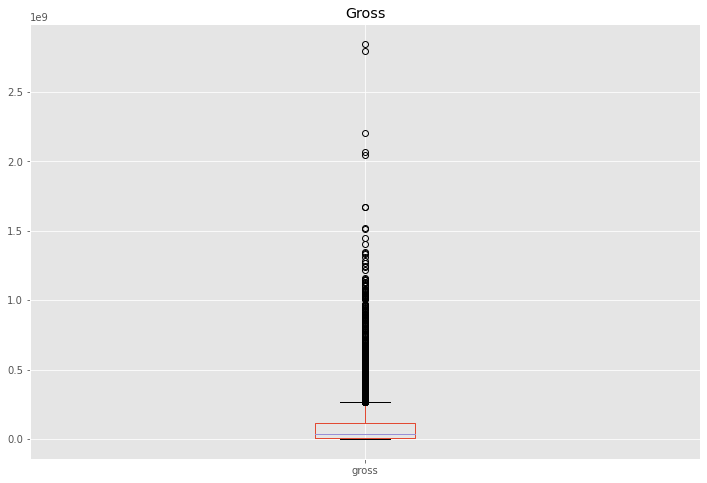

In [11]:
# 想確認 gross 的部分有無outliers

df.boxplot(column=['gross'])
plt.title('Gross')


Text(0, 0.5, 'Gross')

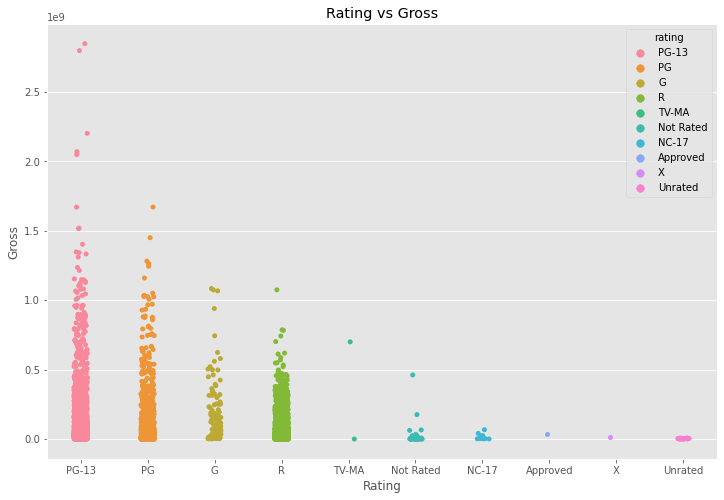

In [12]:
#不同電影分級 gross 的分布

sns.stripplot(x='rating', y='gross', hue = 'rating', data=df)

plt.title('Rating vs Gross')
plt.xlabel('Rating')
plt.ylabel('Gross')

In [13]:
#我假設 budget & score 和 gross有高度的相關 越多成本還有分數越高會有越多的 gross

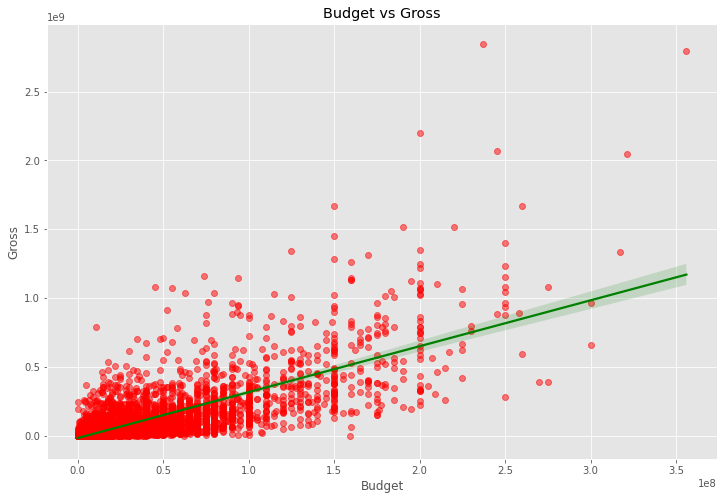

In [14]:
#scatter plot with budget vs gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red', 'alpha': 0.5},
           line_kws={'color':'green'})

plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

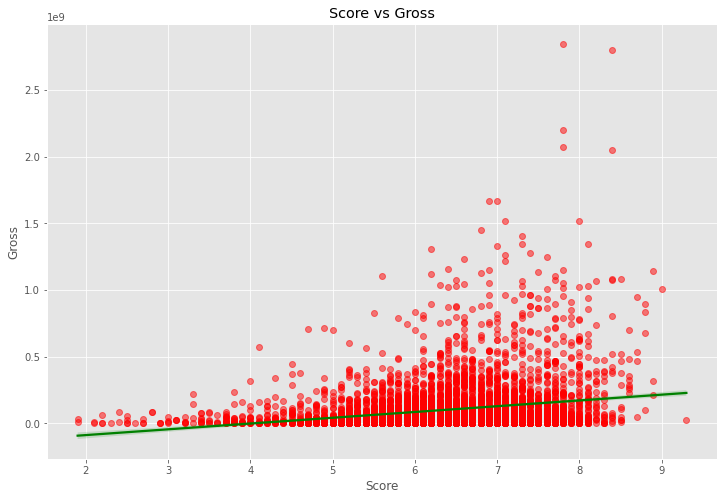

In [15]:
# Plot the score vs gross using seaborn

sns.regplot(x='score', y='gross', data=df, scatter_kws={'color':'red', 'alpha': 0.5},
           line_kws={'color':'green'})

plt.title('Score vs Gross')
plt.xlabel('Score')
plt.ylabel('Gross')

plt.show()

In [16]:
#可以發現 score 與 gross 並無太大相關

In [17]:
#選擇相關係數的方式並用預設值
# pearson, kendall
df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [18]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


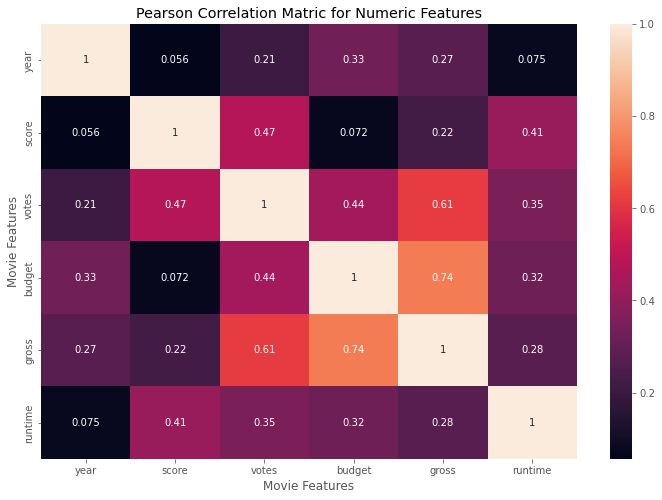

In [19]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Pearson Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

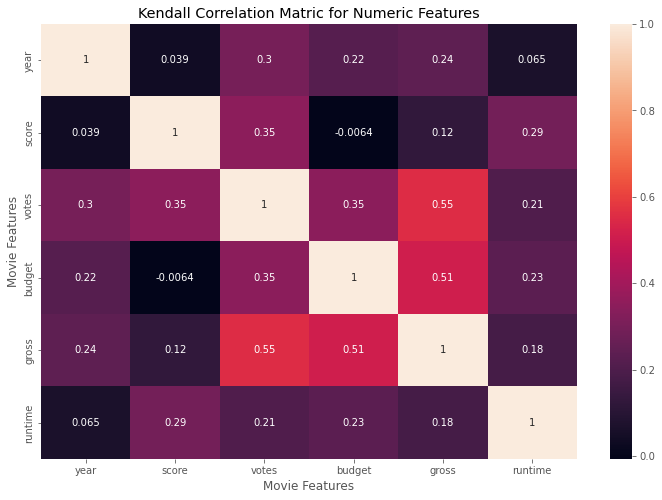

In [20]:
correlation_matrix = df.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Kendall Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [21]:
#Gross vs Budget
#Pearson:約為0.74，顯示較強的正線性相關性。這表示票房和預算之間存在著正向關係
#Kendall:約為0.512，表明它們之間存在一種類似等級的關聯性。這也強調了票房和預算之間的相關性。

# Gross vs Votes
# Pearson：約為0.614 這表示票房和觀眾投票數之間存在著正向關係
# Kendall：約為0.553 表明它們之間存在一種類似等級的關聯性。這也強調了票房和投票數之間的相關性。


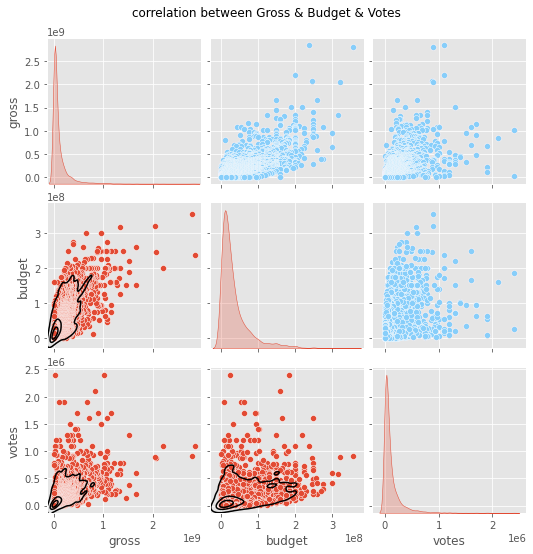

In [22]:
# correlation between 'gross', 'budget', 'votes'

new = pd.DataFrame(df, columns=['gross', 'budget', 'votes'])

graph = sns.pairplot(new, diag_kind="kde")

graph.map_upper(sns.scatterplot, color = 'lightskyblue')
graph.map_lower(sns.kdeplot, levels=4, color = 'black')

graph.fig.suptitle("correlation between Gross & Budget & Votes", y=1.02)

plt.show()

In [23]:
#現在來看company的部分


In [24]:
#將數字類型資料以外的 用分類變成整數型態 方便操作

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,35
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,14
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108,21
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85,2


In [25]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


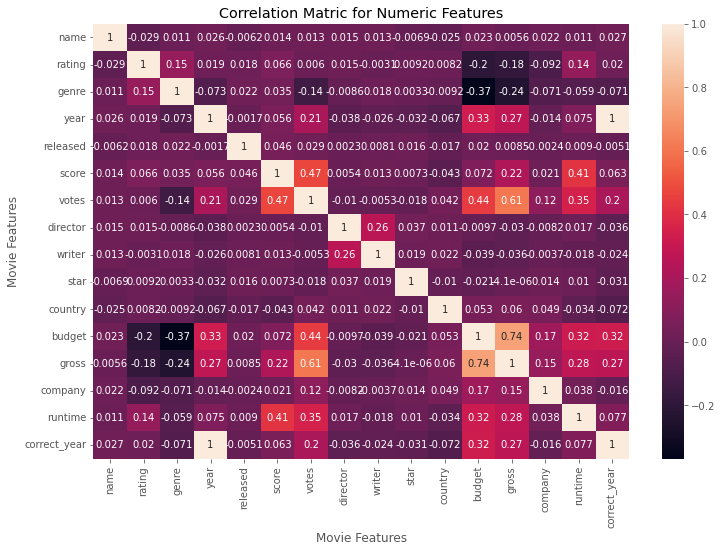

In [26]:
# 所有資料成整數型態後 可以看到更清楚的相關性

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [27]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026759
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019560
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.070699
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.996723
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005141
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.062648
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.204183
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035738
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.023603
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.030840


In [28]:
correlation_num = df_numerized.corr()
corr_pairs = correlation_num.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
                                ...   
correct_year  budget          0.321624
              gross           0.269479
              company        -0.015587
              runtime         0.076666
              correct_year    1.000000
Length: 256, dtype: float64

In [29]:
#按照大小排列出所有資料的相關係數

sorted_pair = corr_pairs.sort_values()

sorted_pair

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
Length: 256, dtype: float64

In [30]:
#尋找相關係數大於 0.5 以上的配對

high_corr = sorted_pair[sorted_pair > 0.5]

high_corr

votes         gross           0.614751
gross         votes           0.614751
              budget          0.740247
budget        gross           0.740247
correct_year  year            0.996723
year          correct_year    0.996723
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

In [31]:
company_corr = sorted_pair['company', 'gross']

company_corr

0.14955258753405165

In [32]:
#假設失敗 Company & gross相關性很低 

In [33]:
# 結論: Budget & Votes 跟 gross 的相關性較高 越高成本以及越多人投票的電影會有較高的票房
# Company 的規模 與 gross 較無關係

In [34]:
# Questions about Data

In [35]:
# 1. 總共有幾部電影

In [36]:
num_movies = df['name'].nunique()
print('There are {} movies'.format(num_movies))

There are 5336 movies


In [37]:
# 2. 有多少部是在美國

In [38]:
us_movie = df[df['country'] == 'United States']
num_us_movie = us_movie['name'].nunique()
print('There are {} movies released by United States'.format(num_us_movie))

There are 4264 movies released by United States


In [39]:
# 3. 最多甚麼類型的電影

In [40]:
most_genre = df['genre'].value_counts().reset_index().iloc[0,0]
print('The most common genre is: {}'.format(most_genre))

The most common genre is: Comedy


In [41]:
# 4. 哪些電影有 8.0 分以上評價然後又低於 120 分鐘

In [42]:
high_score_short_movie = df[(df['score']>8) & (df['runtime'] < 120)]['name'].reset_index(drop = True)
for inx, movie in enumerate(high_score_short_movie, start=1):
    print('{} - {}'.format(inx, movie))

1 - The Lion King
2 - Toy Story 3
3 - Finding Nemo
4 - Inside Out
5 - Coco
6 - Up
7 - The Sixth Sense
8 - Monsters, Inc.
9 - WALL·E
10 - How to Train Your Dragon
11 - Toy Story
12 - Indiana Jones and the Raiders of the Lost Ark
13 - 1917
14 - Back to the Future
15 - Spider-Man: Into the Spider-Verse
16 - The Silence of the Lambs
17 - Gran Torino
18 - The Truman Show
19 - Howl's Moving Castle
20 - Life Is Beautiful
21 - Kill Bill: Vol. 1
22 - The Grand Budapest Hotel
23 - Three Billboards Outside Ebbing, Missouri
24 - Pan's Labyrinth
25 - Eternal Sunshine of the Spotless Mind
26 - Fargo
27 - Stand by Me
28 - Whiplash
29 - The Big Lebowski
30 - Full Metal Jacket
31 - Blade Runner
32 - Memento
33 - Room
34 - The Princess Bride
35 - My Neighbor Totoro
36 - American History X
37 - The Usual Suspects
38 - The Thing
39 - Before Sunset
40 - The Hunt
41 - Requiem for a Dream
42 - Before Sunrise
43 - Reservoir Dogs
44 - The Celebration
45 - Children of Heaven


In [43]:
# 5. 平均票房前10大的電影明星有誰

star = pd.DataFrame(df, columns=['star','gross'])
star = df.groupby(['star'])[['gross']].sum()
star_gross = star.sort_values('gross', ascending = False)[:10].reset_index()
star_gross

,star,gross
0,Robert Downey Jr.,11855937746
1,Tom Hanks,9899944903
2,Tom Cruise,9440309875
3,Will Smith,7947279234
4,Johnny Depp,7410125354
5,Daniel Radcliffe,6971268037
6,Leonardo DiCaprio,6963367648
7,Vin Diesel,6036312568
8,Dwayne Johnson,5711270624
9,Bruce Willis,5318951036


Text(0.5, 1.0, 'Top 10 Star Gross')

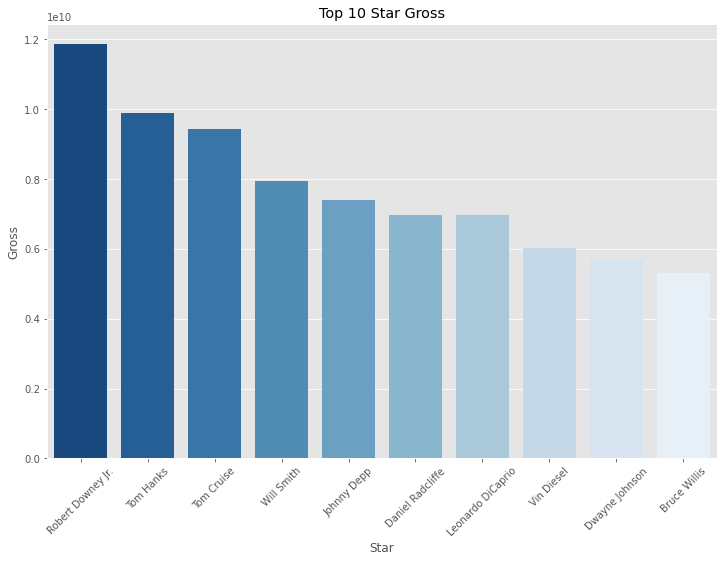

In [44]:
ax = sns.barplot(x='star', y='gross', data=star_gross, palette='Blues_r')
plt.xlabel('Star')
plt.ylabel('Gross')
plt.xticks(rotation = 45)
plt.title('Top 10 Star Gross')

In [45]:
# 6. Gross 逐年的變化

Text(0.5, 1.0, 'Gross Earning Over Years')

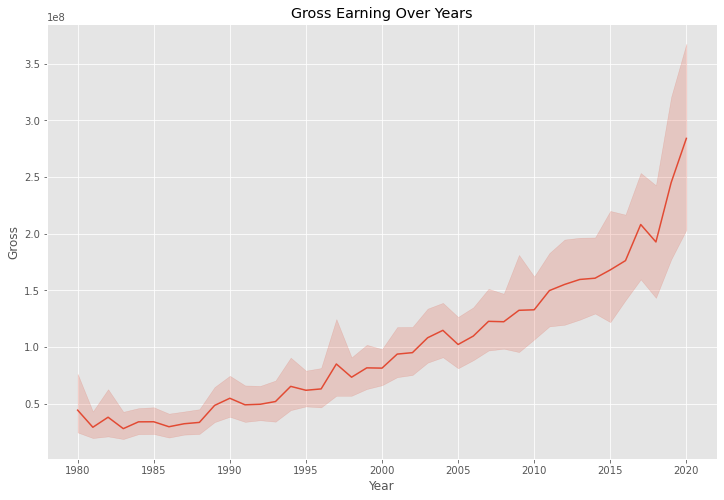

In [46]:
sns.lineplot(data = df, x='year', y='gross')
plt.xlabel('Year')
plt.ylabel('Gross')
plt.title('Gross Earning Over Years')

In [47]:
avg_budget = df.groupby(['year'])[['budget']].mean().reset_index()
print(avg_budget)

    year        budget
0   1980  1.156625e+07
1   1981  1.099841e+07
2   1982  1.176725e+07
3   1983  1.069517e+07
4   1984  1.260915e+07
5   1985  1.271853e+07
6   1986  1.275442e+07
7   1987  1.314007e+07
8   1988  1.328715e+07
9   1989  1.538424e+07
10  1990  1.823877e+07
11  1991  1.998450e+07
12  1992  2.021343e+07
13  1993  1.904750e+07
14  1994  2.539262e+07
15  1995  2.566546e+07
16  1996  2.878181e+07
17  1997  3.524795e+07
18  1998  3.689031e+07
19  1999  4.121877e+07
20  2000  3.907562e+07
21  2001  3.927378e+07
22  2002  3.662213e+07
23  2003  4.149956e+07
24  2004  4.428688e+07
25  2005  4.229114e+07
26  2006  4.390000e+07
27  2007  4.500325e+07
28  2008  4.376509e+07
29  2009  4.399123e+07
30  2010  4.666311e+07
31  2011  4.917956e+07
32  2012  4.776108e+07
33  2013  5.032093e+07
34  2014  4.573190e+07
35  2015  4.692132e+07
36  2016  5.560127e+07
37  2017  5.571203e+07
38  2018  4.904182e+07
39  2019  5.873407e+07
40  2020  1.076875e+08


In [48]:
# 7. Budget 逐年的變化

Text(0.5, 1.0, 'Bedget Over Years')

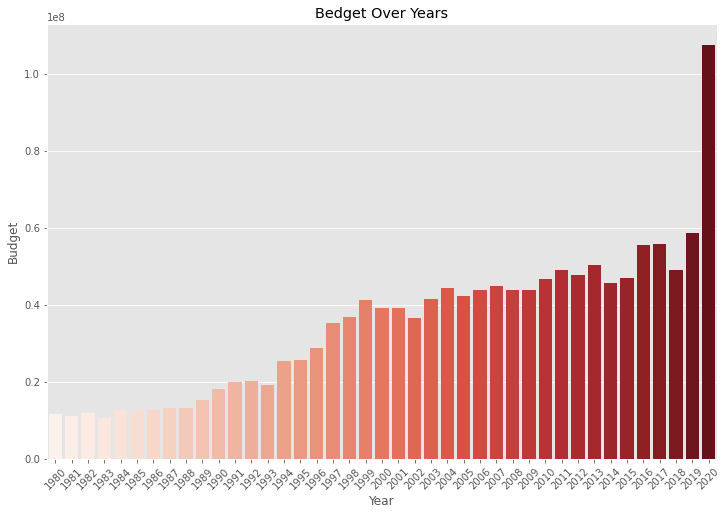

In [49]:
avg_budget = df.groupby(['year'])[['budget']].mean().reset_index()
sns.barplot(data=avg_budget, x='year', y='budget', estimator=np.mean, palette="Reds")
plt.xlabel('Year')
plt.ylabel('Budget')
plt.xticks(rotation = 45)
plt.title('Bedget Over Years')

In [50]:
# 8. 電影分級與評分分布

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Horror'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Sci-Fi'),
  Text(13, 0, 'Thriller'),
  Text(14, 0, 'Western')])

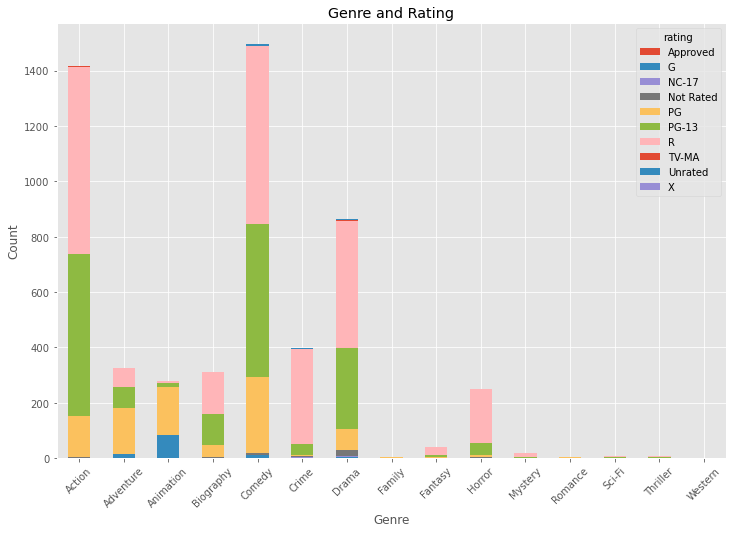

In [52]:
genre_count = df.groupby(['genre', 'rating']).size().unstack()
genre_count.plot(kind='bar', stacked=True)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre and Rating")
plt.xticks(rotation=45)

In [53]:
genre_count

rating,Approved,G,NC-17,Not Rated,PG,PG-13,R,TV-MA,Unrated,X
genre,,,,,,,,,,
Action,NaN,NaN,NaN,5.0,146.0,586.0,677.0,1.0,NaN,NaN
Adventure,1.0,13.0,NaN,NaN,166.0,76.0,71.0,NaN,NaN,NaN
Animation,NaN,82.0,NaN,1.0,175.0,13.0,6.0,NaN,NaN,NaN
Biography,NaN,1.0,NaN,2.0,46.0,109.0,152.0,NaN,1.0,NaN
Comedy,NaN,11.0,2.0,6.0,275.0,552.0,642.0,NaN,8.0,NaN
Crime,NaN,NaN,3.0,4.0,5.0,38.0,345.0,NaN,4.0,NaN
Drama,NaN,3.0,6.0,20.0,77.0,292.0,460.0,1.0,4.0,NaN
Family,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Fantasy,NaN,NaN,NaN,2.0,3.0,8.0,28.0,NaN,NaN,NaN
